# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [2]:
import matplotlib.pyplot as  plt
%matplotlib inline

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **

In [4]:
# Noise is added here

# Generate random noise with the same shape as the image
import numpy as np
mean = .5
stddev = .16
noise = np.random.normal(mean, stddev, x_train[1].shape)

# Add the noise to the image
image_noise_added = x_train[1] + noise
image_noise_added


# The max value of the noise should not grossly surpass 1.0
max(noise)

0.9814309422337107

In [5]:
# Max of noise is less than .1002; very slightly over 1  

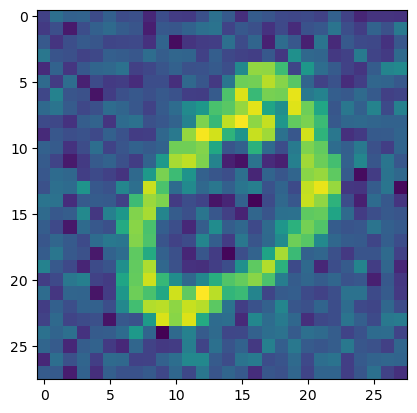

In [6]:
# New Image vs Old
# New Image
plt.imshow(image_noise_added.reshape(28, 28))

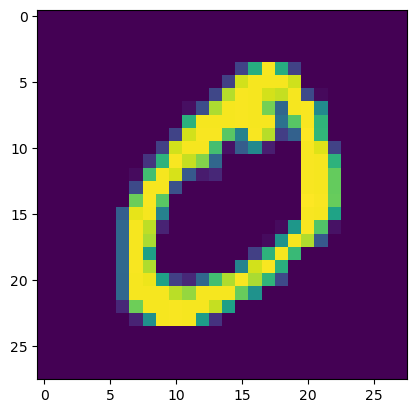

In [7]:
# Old Image
plt.imshow(x_train[1].reshape(28, 28))

In [8]:
### Add noise to whole set of images 
# Noise is added here

# Generate random noise with the same shape as the image
import numpy as np
mean = .5
stddev = .16
noise = np.random.normal(mean, stddev, x_train.shape)

# Generate random noise with the same shape as the image
test_noise = np.random.normal(mean, stddev, x_test.shape)
y_train_noise = np.random.normal(mean, stddev, y_train.shape)
y_test_noise = np.random.normal(mean, stddev, y_test.shape)

# Add noise
x_train_noise = x_train + noise
x_test_noise = x_test + test_noise
y_train_noise = y_train + y_train_noise
y_test_noise = y_test + y_test_noise

# Add noise
x_test_noise[1]

array([ 0.57687232,  0.40826787,  0.48698683,  0.50217036,  0.645252  ,
        0.61910315,  0.41440629,  0.51303236,  0.63962366,  0.64682592,
        0.37467939,  0.52838516,  0.57147313,  0.60116104,  0.42979264,
        0.47278035,  0.17707505,  0.6037902 ,  0.38793955,  0.4623349 ,
        0.19363086,  0.37676522,  0.67193465,  0.58154555,  0.46630765,
        0.34852071,  0.42603748,  0.60274664,  0.34968219,  0.57033017,
        0.32556246,  0.34093753,  0.46699395,  0.40841534,  0.31135967,
        0.40805849,  0.55859174,  0.638774  ,  0.30170078,  0.73114616,
        0.37730497,  0.63878796,  0.44348356,  0.5813878 ,  0.60068954,
        0.28910888,  0.62700597,  0.36169634,  0.46364495,  0.46958263,
        0.50642522,  0.4631466 ,  0.48307732,  0.63050008,  0.54317324,
        0.46467005,  0.76507951,  0.41156469,  0.67368421,  0.45407504,
        0.41759021,  0.26744614,  0.52759676,  0.53368195,  0.48003363,
        0.51910648,  0.79028283,  0.72157947,  0.47613033,  0.38

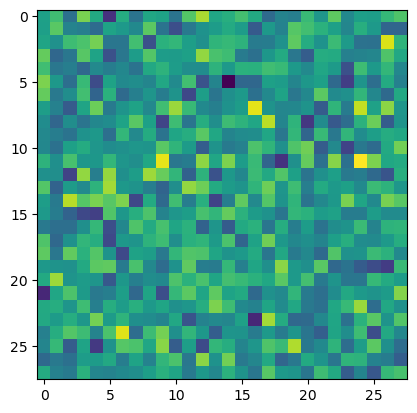

In [9]:
# Compare Noises to Ensure they are Different
# Noise on Image 122
plt.imshow(noise[122].reshape(28, 28))

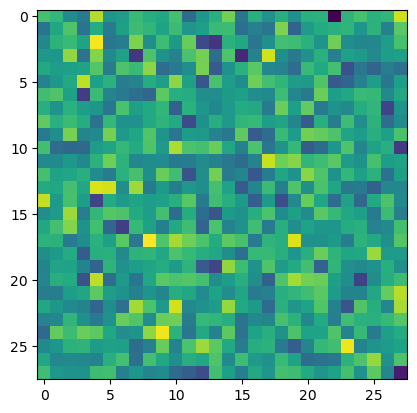

In [10]:
# Noise on Image 124
plt.imshow(noise[124].reshape(28, 28))

In [11]:
# As the two visual representations (images) of the noise show different patterns, they are indicating different noise levels
# for each image 

2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 

In [12]:
%%capture
## Code From Base for Creating Neural Network Without Noise
batch_size = 128
num_classes = 10
epochs = 20

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [13]:
import pandas as pd
(
np.max(x_train_noise),
np.min(x_train_noise),
np.max(x_train),
np.min(x_train)
)

(2.317632454193437, -0.4185654653815156, 1.0, 0.0)

In [14]:
# Normalization
mean = np.mean(x_train_noise)
std = np.std(x_train_noise)
x_train_noise_norm = (x_train_noise - mean) / std

mean = np.mean(x_test_noise)
std = np.std(x_test_noise)
x_test_noise_norm = (x_test_noise - mean) / std

mean = np.mean(y_train_noise)
std = np.std(y_train_noise)
y_train_noise_norm = (y_train_noise - mean) / std

mean = np.mean(y_test_noise)
std = np.std(y_test_noise)
y_test_noise_norm = (y_test_noise - mean) / std

In [15]:
%%capture
## Updated Code for Creating Neural Network With Noise
batch_size = 128
num_classes = 10
# epochs = 20 ## Commenting out; this ensures the same number of epochs is used for both models 

# convert class vectors to binary class matrices - using noise added images
y_train_bcm = keras.utils.to_categorical(y_train_noise_norm, num_classes)
y_test_bcm = keras.utils.to_categorical(y_test_noise_norm, num_classes)

noisy_model = Sequential()
noisy_model.add(Dense(512, activation='relu', input_shape=(784,)))
noisy_model.add(Dropout(0.2))
noisy_model.add(Dense(512, activation='relu'))
noisy_model.add(Dropout(0.2))
noisy_model.add(Dense(10, activation='softmax'))

noisy_model.summary()

noisy_model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = noisy_model.fit(x_train_noise_norm, y_train_bcm,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_noise_norm, y_test_bcm))
noisy_score = noisy_model.evaluate(x_test_noise_norm, y_test_bcm, verbose=0)
print('Test loss:', noisy_score[0])
print('Test accuracy:', noisy_score[1])

In [16]:
print('Test loss:', score[0]) # Test loss & accuracy statistics for the model trained on the dataset without noise 
print('Test accuracy:', score[1])
print('Test loss:', noisy_score[0]) # The same statistics for the model trained with noise
print('Test accuracy:', noisy_score[1])

Test loss: 0.0920642837882042
Test accuracy: 0.9800999760627747
Test loss: 0.1428346335887909
Test accuracy: 0.9804999828338623


In [17]:
# Comparing the without-noise and with-noise models, we find that the noise reduces accuracy by a very slight amount for 
# a training series lasting n=20 epochs. Additionally, the test loss statistic is noiceably higher for the noisy model. 

3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

In [18]:
%%capture
## Combining Noise Code with Model-Running code for a single, repeatable block:
# Listing Scale (i.e. Standard Deviation) Values over which to train models
stddev_values = [0.1, 0.5, 1.0, 2.0, 4.0]  # Values given 
# Initializing Lists
loss_values = []
accuracy_values = []

# Loop:
for stddev in stddev_values:

    # Generate random noise with the same shape as the image
    mean = .5
    stddev = .16

    # Generate random noise with the same shape as the image
    x_train_noise = np.random.normal(mean, stddev, x_train.shape)
    x_test_noise = np.random.normal(mean, stddev, x_test.shape)
    y_train_noise = np.random.normal(mean, stddev, y_train.shape)
    y_test_noise = np.random.normal(mean, stddev, y_test.shape)

    # Add noise
    x_train_noise = x_train + x_train_noise
    x_test_noise = x_test + x_test_noise
    y_train_noise = y_train + y_train_noise
    y_test_noise = y_test + y_test_noise

    ## Updated Code for Creating Neural Network With Noise
    batch_size = 128
    num_classes = 10
    epochs = 20 # Always using same number of epochs

    # convert class vectors to binary class matrices
    y_train_bcm = keras.utils.to_categorical(y_train_noise_norm, num_classes)
    y_test_bcm = keras.utils.to_categorical(y_test_noise_norm, num_classes)

    noisy_model = Sequential()
    noisy_model.add(Dense(512, activation='relu', input_shape=(784,)))
    noisy_model.add(Dropout(0.2))
    noisy_model.add(Dense(512, activation='relu'))
    noisy_model.add(Dropout(0.2))
    noisy_model.add(Dense(10, activation='softmax'))

    noisy_model.summary()

    noisy_model.compile(loss='categorical_crossentropy',
                  optimizer="adam",
                  metrics=['accuracy'])

    history = noisy_model.fit(x_train_noise_norm, y_train_bcm,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test_noise_norm, y_test_bcm))
    noisy_score = noisy_model.evaluate(x_test_noise_norm, y_test_bcm, verbose=0)
    print('Test loss:', noisy_score[0])
    print('Test accuracy:', noisy_score[1])
    # Append Loss & Accuracy To List 
    test_loss = noisy_score[0]
    test_accuracy = noisy_score[1]
    loss_values.append(test_loss)
    accuracy_values.append(test_accuracy)

In [19]:
# Compile Loss and Accuracy statistics for the models into a single data frame 
accuracy_loss_results_dataframe = pd.DataFrame({'stddev_values': stddev_values, 'loss_values': loss_values, 'accuracy_values': accuracy_values})
accuracy_loss_results_dataframe

,stddev_values,loss_values,accuracy_values
0,0.1,0.161019,0.9780
1,0.5,0.135908,0.9786
2,1.0,0.144020,0.9772
3,2.0,0.136160,0.9782
4,4.0,0.150436,0.9775


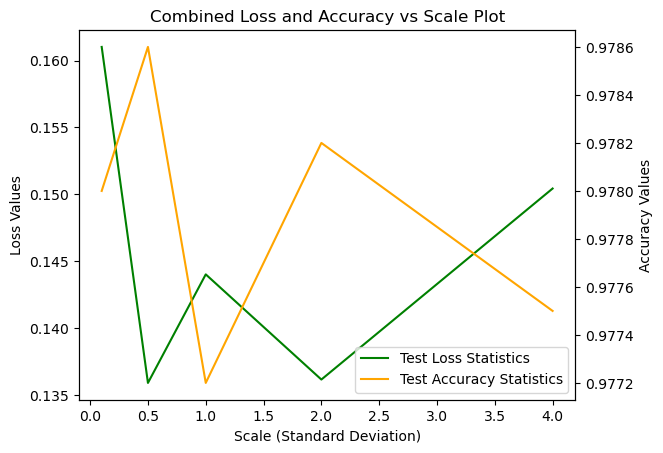

In [20]:
# Plotting Results
fig, ax1 = plt.subplots()
loss_line = ax1.plot(stddev_values, loss_values, color = 'green', label = 'Test Loss Statistics')

# Loss line Plot
ax1.set_xlabel('Scale (Standard Deviation)')
ax1.set_ylabel('Loss Values')
ax1.set_title('Combined Loss and Accuracy vs Scale Plot')

# Accuracy line Plot
ax2 = ax1.twinx()
accuracy_line = ax2.plot(stddev_values, accuracy_values, color='orange', label='Test Accuracy Statistics')
ax2.set_ylabel('Accuracy Values')

# Combine Both Lines Into One Plot
lines = loss_line + accuracy_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')